In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('uber.csv', encoding = 'ISO-8859-1')

In [65]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [66]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [67]:
df['pickup_longitude'].fillna(value = df['pickup_longitude'].mean(), inplace = True)
df['pickup_latitude'].fillna(value = df['pickup_latitude'].mean(), inplace = True)

In [68]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [69]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
              day = df.pickup_datetime.dt.day,
              month = df.pickup_datetime.dt.month,
              year = df.pickup_datetime.dt.year,
              dayofweek = df.pickup_datetime.dt.dayofweek)

In [70]:
df = df.drop('pickup_datetime', axis = 1)

In [71]:
import seaborn as sns

Unnamed: 0              AxesSubplot(0.125,0.712609;0.168478x0.167391)
fare_amount          AxesSubplot(0.327174,0.712609;0.168478x0.167391)
pickup_longitude     AxesSubplot(0.529348,0.712609;0.168478x0.167391)
pickup_latitude      AxesSubplot(0.731522,0.712609;0.168478x0.167391)
dropoff_longitude       AxesSubplot(0.125,0.511739;0.168478x0.167391)
dropoff_latitude     AxesSubplot(0.327174,0.511739;0.168478x0.167391)
passenger_count      AxesSubplot(0.529348,0.511739;0.168478x0.167391)
hour                 AxesSubplot(0.731522,0.511739;0.168478x0.167391)
day                      AxesSubplot(0.125,0.31087;0.168478x0.167391)
month                 AxesSubplot(0.327174,0.31087;0.168478x0.167391)
year                  AxesSubplot(0.529348,0.31087;0.168478x0.167391)
dayofweek             AxesSubplot(0.731522,0.31087;0.168478x0.167391)
dtype: object

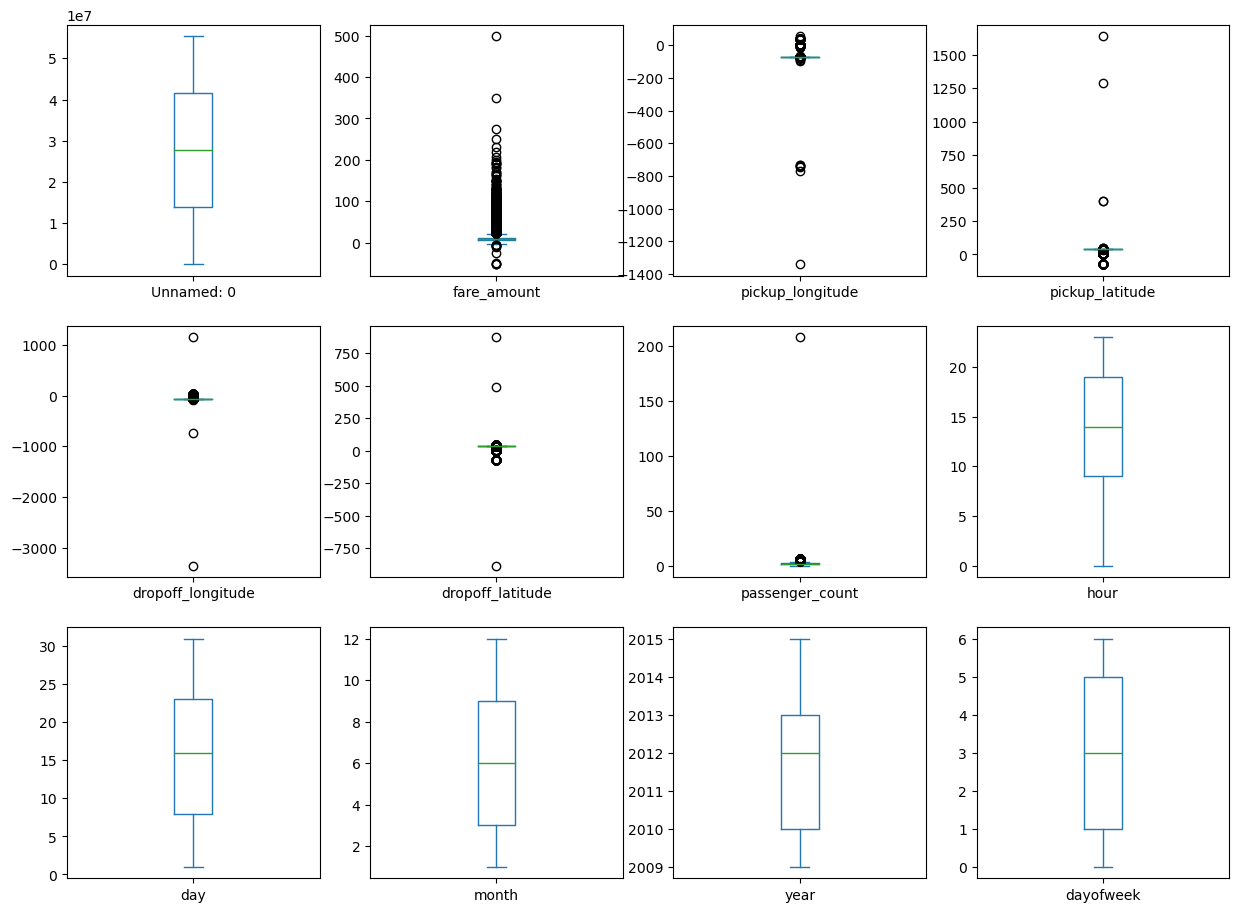

In [72]:
# sns.boxplot(df['fare_amount'])
df.plot(kind = 'box', subplots = True, layout =(4,4), figsize = (15,15))

In [73]:
q1 = df[:].quantile(0.25)
q3 = df[:].quantile(0.75)
iqr = q3-q1
low = q1-1.5*iqr
up = q3+1.5*iqr

df = df[(df[:]>=low) & (df[:]<=up)]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21072\1512379116.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[(df[:]>=low) & (df[:]<=up)]


Unnamed: 0              AxesSubplot(0.125,0.712609;0.168478x0.167391)
fare_amount          AxesSubplot(0.327174,0.712609;0.168478x0.167391)
pickup_longitude     AxesSubplot(0.529348,0.712609;0.168478x0.167391)
pickup_latitude      AxesSubplot(0.731522,0.712609;0.168478x0.167391)
dropoff_longitude       AxesSubplot(0.125,0.511739;0.168478x0.167391)
dropoff_latitude     AxesSubplot(0.327174,0.511739;0.168478x0.167391)
passenger_count      AxesSubplot(0.529348,0.511739;0.168478x0.167391)
hour                 AxesSubplot(0.731522,0.511739;0.168478x0.167391)
day                      AxesSubplot(0.125,0.31087;0.168478x0.167391)
month                 AxesSubplot(0.327174,0.31087;0.168478x0.167391)
year                  AxesSubplot(0.529348,0.31087;0.168478x0.167391)
dayofweek             AxesSubplot(0.731522,0.31087;0.168478x0.167391)
dtype: object

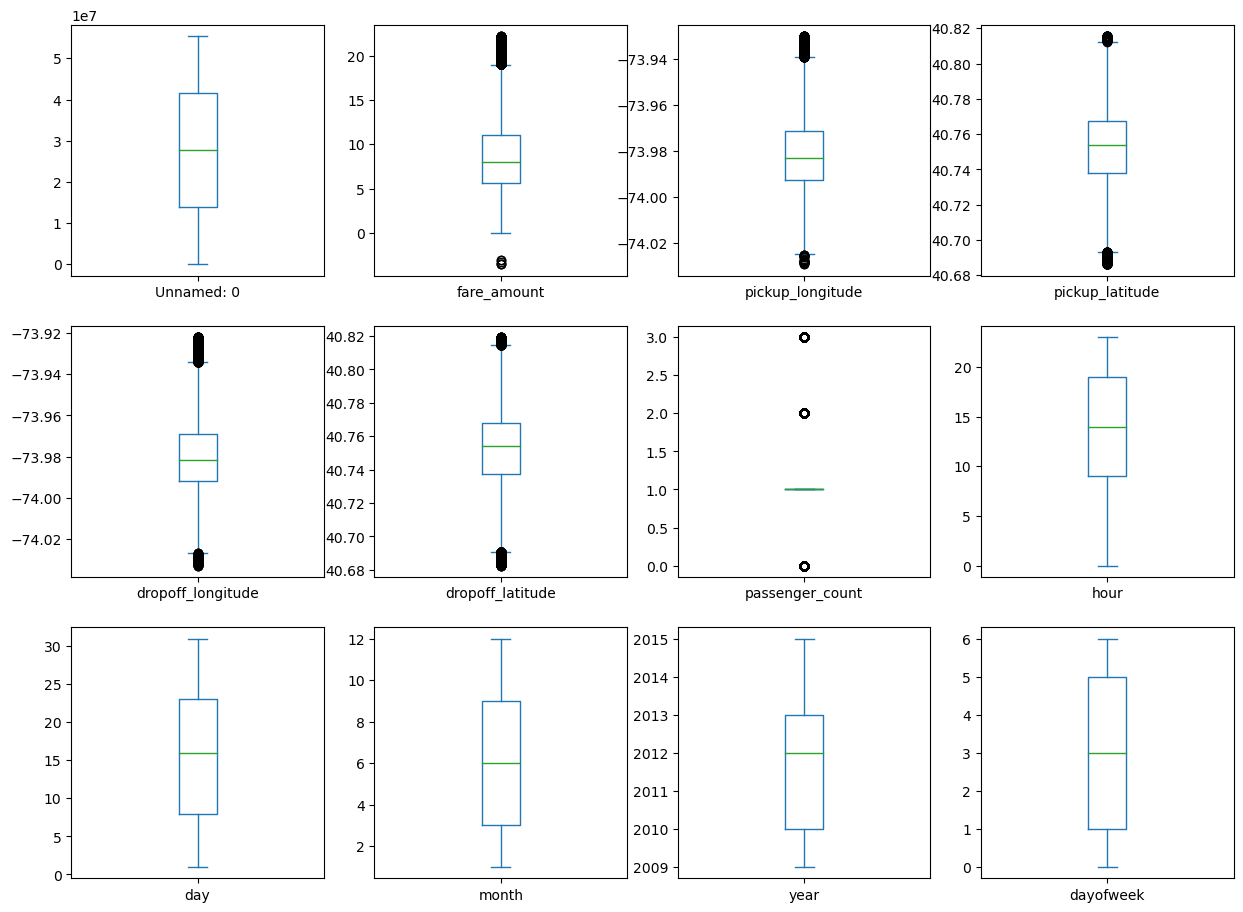

In [74]:
# sns.boxplot(df['fare_amount'])
df.plot(kind = 'box', subplots = True, layout =(4,4), figsize = (15,15))

In [75]:
cor = df.corr()

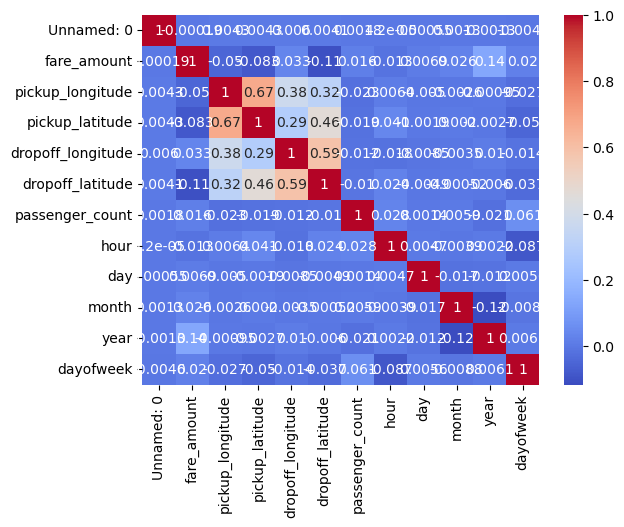

In [76]:
sns.heatmap(cor, annot=True, cmap = 'coolwarm')
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
x = df[[ 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek']]
y= df['fare_amount']

In [28]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [39]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

Text(0, 0.5, 'prediction')

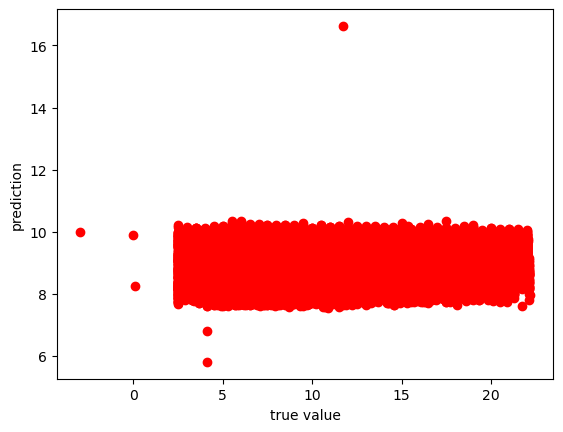

In [40]:
y_pred = lr_model.predict(x_test)
plt.scatter(y_test,y_pred , color = 'red')
plt.xlabel('true value')
plt.ylabel('prediction')

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

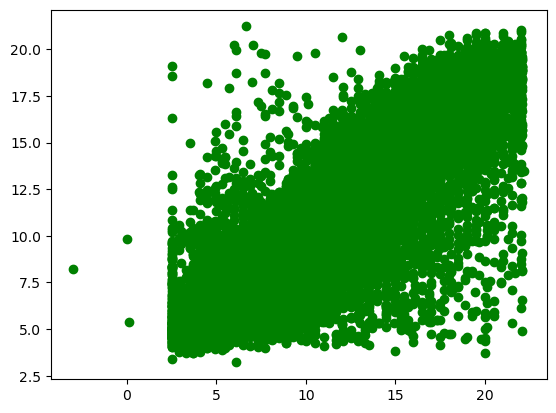

In [45]:
y_pre = rf_model.predict(x_test)
plt.scatter(y_test, y_pre, color = 'green')

In [47]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [51]:
lr_r2 = r2_score(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pre)
print(lr_r2)
print(rf_r2)

0.021369661511242866
0.756443322843329


In [50]:
lr_rmse = sqrt(mean_squared_error(y_test, y_pred))
rf_rmse = sqrt(mean_squared_error(y_test, y_pred))